In [1]:
# Task is to classify the following words from audio files yes, no, up, down, left, right, on, off, stop, go, and noise
from scipy.io import wavfile
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import os

audioDataPath = "train/audio/"
mfccDataPath = "mfcc/data/"
mfccDynamicDataPath = "mfcc/data/dynamic/"
mfccTransformDataPath = "mfcc/transform/data/"
mfccTransformDynamicDataPath = "mfcc/transfrom/dynamic/data/"

wordsToRecognize = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

def readAudioFile(path):
    samplerate, data = wavfile.read(path)
    data = data / (2**15) 
    return data, samplerate
    

testSampleData, testSampleRate = readAudioFile("train/audio/down/0a9f9af7_nohash_0.wav")
testLength = testSampleData.shape[0] / testSampleRate
print(f"testSampleRate = {testLength}s")

testSampleRate = 0.853375s


In [2]:
# PART 3 Cepstrograms
from python_speech_features import mfcc
from scipy.stats import zscore
from scipy import signal
from python_speech_features import delta


def getFeaturesFromAudioData(data, sampleRate):
    mfccData = mfcc(data, sampleRate, winlen=0.03, nfft=1024)
    normalizedMfccData = zscore(mfccData, axis=1, ddof=1)
    
    return normalizedMfccData

## Include later to get better accuracy 
#     mfccDataDelta1 = delta(mfccData, 2)
#     normalizedMfccDataDelta = zscore(mfccDataDelta1, axis=1, ddof=1)

#     mfccDataDelta2 = delta(mfccDataDelta1, 2)
#     normalizedMfccDataDelta2 = zscore(mfccDataDelta2, axis=1, ddof=1)

#     features = np.concatenate((normalizedMfccData, normalizedMfccDataDelta, normalizedMfccDataDelta2), axis=1)
#     return features



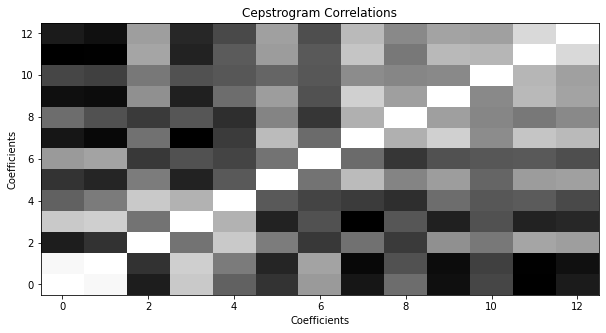

In [4]:
for word in wordsToRecognize:
    count = 0
    testCount = 0
    dataDirectory = os.fsencode(audioDataPath + word)
    trainingDataDirectoryPath = mfccTransformDataPath + word + "/train/"
    testDataDirectoryPath = mfccTransformDataPath + word + "/test/"
    
    for file in os.listdir(trainingDataDirectory):
        audioFileName = os.fsdecode(file)
        if audioFileName.endswith(".wav"):
            data, sampleRate = readAudioFile(audioDataPath + word + "/" + audioFileName)
            features = getFeaturesFromAudioData(data, sampleRate)
            count += 1
            if count % 10 == 0:
                if not os.path.exists(testDataDirectoryPath):
                    os.makedirs(testDataDirectoryPath)
                testCount += 1
                np.save(testDataDirectoryPath + str(testCount) + ".npy", features.T)
            else: 
                if not os.path.exists(trainingDataDirectoryPath):
                    os.makedirs(trainingDataDirectoryPath)
                np.save(trainingDataDirectoryPath + str(count) + ".npy", features.T)

[[-1.15796677 -1.77858185 -0.91070751 ...  0.16357296 -1.30165663
  -1.42729736]
 [-1.09404959 -1.79494472 -0.94777161 ... -1.0424962  -1.63708301
  -1.40641406]
 [-1.17647304 -1.86249091 -0.74811606 ... -2.31548974 -0.79824355
  -0.96324748]
 ...
 [-0.26737718  0.86461775 -0.12281587 ... -0.04308184 -0.9471223
   1.53365165]
 [-0.27704328  0.69913651  0.0899572  ...  0.12367121 -0.59856865
   1.64064641]
 [-0.48484206  0.5053619   0.64871594 ...  0.60785133  0.0372883
   0.66186998]]
